In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/IR-assignment-2-data (2).txt', sep = ' ', header = None)

In [5]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239088,0,qid:29989,1:2,2:0,3:1,4:1,5:2,6:1,7:0,8:0.50000,...,128:9754,129:29,130:2889,131:63571,132:1,133:1,134:0,135:0,136:0,NaN
239089,0,qid:29989,1:2,2:0,3:1,4:0,5:2,6:1,7:0,8:0.50000,...,128:84,129:1,130:9450,131:19599,132:4,133:4,134:0,135:0,136:0,NaN
239090,1,qid:29989,1:2,2:0,3:2,4:2,5:2,6:1,7:0,8:1,...,128:1,129:0,130:144,131:6701,132:5,133:2,134:0,135:0,136:0,NaN
239091,1,qid:29989,1:2,2:0,3:2,4:0,5:2,6:1,7:0,8:1,...,128:0,129:11,130:2152,131:65535,132:37,133:16,134:0,135:0,136:0,NaN


In [6]:
df = dataset[dataset[1] == 'qid:4']

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,NaN
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,NaN
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,NaN
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,NaN


Sorting in accordance with maxDCG

In [8]:
final_df = df.sort_values(ascending = False, by = 0).reset_index(drop = True)

In [9]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0,NaN
1,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9,NaN
2,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0,NaN
3,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047,NaN
4,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:8,129:0,130:868,131:9260,132:246,133:88,134:0,135:0,136:0,NaN
99,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:4,129:0,130:797,131:9260,132:237,133:80,134:0,135:0,136:0,NaN
100,0,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,128:83,129:5,130:144,131:262,132:157,133:179,134:0,135:0,136:0,NaN
101,0,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,8:1,...,128:195,129:8,130:124,131:206,132:103,133:121,134:0,135:0,136:0,NaN


In [10]:
final_df.to_csv('maxDcg.csv')

In [24]:
#### No of files
classes=df[0].unique()
files = 1
for val in classes:
    num = len(df[df[0] == val])
    files = files * math.factorial(num)

files

19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000

# **Normalised DCG**

In [13]:
def norm_dcg(df, n):
    ans = 0
    for i in range(n):
        ans += (pow(2,df[0][i]) - 1)/np.log2(i+2)
    return ans

In [14]:
print(norm_dcg(df,50))
print(norm_dcg(final_df,50))
print(norm_dcg(df,50)/norm_dcg(final_df,50))

10.323516383590077
28.98846753873482
0.35612494416255847


In [15]:
print(norm_dcg(df,len(df)))
print(norm_dcg(final_df,len(df)))
print(norm_dcg(df,len(df))/norm_dcg(final_df,len(final_df)))

16.768935581665193
28.98846753873482
0.5784691984582591


In [16]:
df

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,NaN
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,NaN
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,NaN
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,NaN


# **Urls based on feature 75**

In [17]:
df[76]

0        75:90.53171
1      75:538.388954
2       75:88.171761
3      75:144.564444
4      75:142.589323
           ...      
98      75:70.460443
99      75:270.13233
100    75:296.023694
101    75:528.520116
102     75:84.625987
Name: 76, Length: 103, dtype: object

In [18]:
labels = np.array(df[0])
labels

array([0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0])

In [19]:
feature_75 = []
for i in range(len(df)):
    feature_75.append(float(df[76][i][3:]))

feature_75

[90.53171,
 538.388954,
 88.171761,
 144.564444,
 142.589323,
 463.099129,
 103.400313,
 411.010633,
 972.826451,
 142.589323,
 84.625987,
 91.160998,
 180.720002,
 237.21632,
 22.480108,
 84.625987,
 14.972391,
 42.227139,
 81.947653,
 157.05992,
 84.625987,
 143.445062,
 166.683125,
 70.466293,
 121.96152,
 69.811973,
 74.434086,
 186.375414,
 79.630746,
 176.875026,
 19.313312,
 187.934366,
 94.958714,
 121.007996,
 89.877389,
 85.634253,
 217.848266,
 156.301965,
 200.840161,
 201.720933,
 192.953467,
 212.401296,
 169.844071,
 148.415271,
 148.415271,
 91.717534,
 143.769297,
 71.646268,
 185.617459,
 3.539923,
 176.000104,
 76.360315,
 237.21632,
 202.442155,
 305.102064,
 188.936782,
 571.500533,
 68.100494,
 142.038637,
 188.129935,
 439.396463,
 161.455583,
 161.15638,
 98.418404,
 43.297629,
 226.444023,
 77.167163,
 612.893205,
 121.814843,
 95.257458,
 18.133337,
 95.257458,
 198.480212,
 316.319283,
 81.140806,
 85.805962,
 108.548081,
 75.987188,
 84.625987,
 177.168378,


In [27]:
ordered_labels = [f for l,f in sorted(zip(feature_75,labels),reverse=True)]
ordered_labels


[0,
 0,
 0,
 0,
 1,
 0,
 1,
 3,
 0,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

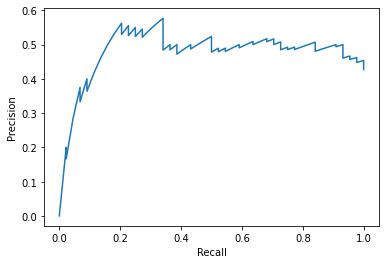

In [28]:
relevant=0
for label in ordered_labels:
  if(label!=0):
    relevant+=1

total_urls=0
rel_urls=0

precision = []
recall = []

for label in ordered_labels:
  total_urls+=1
  
  if(label!=0):
    rel_urls+=1

  precision.append(rel_urls/total_urls)
  recall.append(rel_urls/relevant)

plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

